# Proyek Akhir: Menyelesaikan Permasalahan Jaya Jaya Institut

- Nama:
- Email:
- Id Dicoding:

## Persiapan

### Menyiapkan library yang dibutuhkan

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import joblib

### Menyiapkan data yang akan digunakan

## Load Data

In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd '/content/drive/MyDrive/Dicoding/Student Performance/'

/content/drive/MyDrive/Dicoding/Student Performance


In [4]:
# Load dataset dengan delimiter ;
df = pd.read_csv("data/data.csv", delimiter=";")

# Tampilkan 5 baris pertama
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

### Struktur Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Dataset ini berisi sebanyak 4424 entri, yang masing-masing merepresentasikan satu siswa, dengan total 37 kolom fitur yang mencakup informasi demografis, akademik, dan sosial-ekonomi. Seluruh data tidak memiliki nilai kosong (missing values), sehingga siap digunakan untuk proses analisis atau pemodelan. Sebagian besar kolom bertipe numerik, terdiri dari 29 kolom integer untuk data kategorikal seperti status pernikahan, jenis kelamin, dan status beasiswa, serta 7 kolom float untuk data numerik kontinu seperti nilai ujian atau tingkat inflasi. Satu-satunya kolom bertipe objek adalah kolom Status, yang berisi label target seperti Dropout, Enrolled, atau Graduate, dan perlu dikonversi menjadi angka sebelum digunakan dalam machine learning. Struktur ini menunjukkan bahwa dataset cukup bersih dan lengkap untuk digunakan dalam proyek prediksi dropout siswa.

### Statistik Deskriptif

In [6]:
print(df.describe())

       Marital_status  Application_mode  Application_order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime_evening_attendance  Previous_qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000                1.000000   
25%                

Dari hasil ini, dapat disimpulkan bahwa sebagian besar siswa adalah belum menikah (Marital_status = 1), dengan rata-rata urutan pendaftaran (Application_order) adalah sekitar 1,7 (umumnya bukan pilihan terakhir). Nilai Admission_grade dan Previous_qualification_grade berada di kisaran menengah, dengan rata-rata di atas 120 (skala 0–200), menunjukkan performa masuk yang cukup baik secara umum. Mahasiswa umumnya mengikuti kelas pagi (Daytime_evening_attendance = 1) dan telah menyelesaikan sekitar 4–5 mata kuliah dengan nilai rata-rata 10–13 per semester.

Beberapa fitur menunjukkan sebaran yang sangat tidak merata. Misalnya, Curricular_units_1st_sem_without_evaluations dan Curricular_units_2nd_sem_credited memiliki median dan kuartil atas 0, namun nilai maksimumnya sangat tinggi (hingga 12 dan 19), menunjukkan hanya sebagian kecil siswa yang memiliki nilai ekstrem tersebut. Fitur-fitur ekonomi makro seperti Unemployment_rate, Inflation_rate, dan GDP memiliki kisaran dan variasi nilai yang tidak terlalu besar karena sama untuk banyak siswa di tahun yang sama.

In [7]:
print(df.describe(include='object'))

          Status
count       4424
unique         3
top     Graduate
freq        2209


Dari total 4424 siswa, terdapat 3 kategori unik dalam kolom ini, yaitu kemungkinan besar Graduate, Dropout, dan Enrolled. Kategori yang paling sering muncul adalah "Graduate", yang muncul sebanyak 2209 kali, menjadikannya kategori dominan dalam dataset. Informasi ini menunjukkan bahwa mayoritas siswa berhasil menyelesaikan studi mereka, namun sisanya terbagi antara yang masih terdaftar (enrolled) dan yang sudah berhenti (dropout). Distribusi ini penting untuk dipahami sebelum melakukan pemodelan, karena ketidakseimbangan jumlah antar kelas dapat memengaruhi kinerja model klasifikasi.

### Distribusi Target Variable

In [8]:
print(df['Status'].value_counts())

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [9]:
print(df['Status'].value_counts(normalize=True))

Status
Graduate    0.499322
Dropout     0.321203
Enrolled    0.179476
Name: proportion, dtype: float64


Dari total 4424 siswa, terdapat 2209 siswa (49,9%) yang berstatus Graduate atau berhasil lulus dari program studi mereka. Sebanyak 1421 siswa (32,1%) mengalami Dropout, yaitu berhenti sebelum menyelesaikan pendidikan, dan sisanya 794 siswa (17,9%) masih dalam status Enrolled atau masih aktif menempuh pendidikan. Distribusi ini menunjukkan bahwa meskipun sebagian besar siswa berhasil menyelesaikan studi, jumlah siswa yang dropout cukup signifikan.

### Univariate Analysis

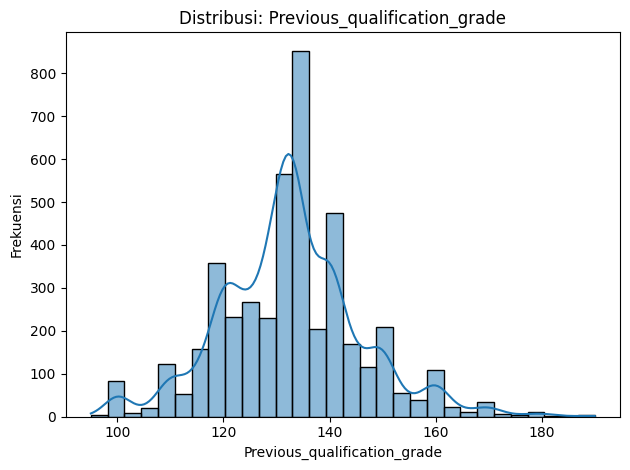

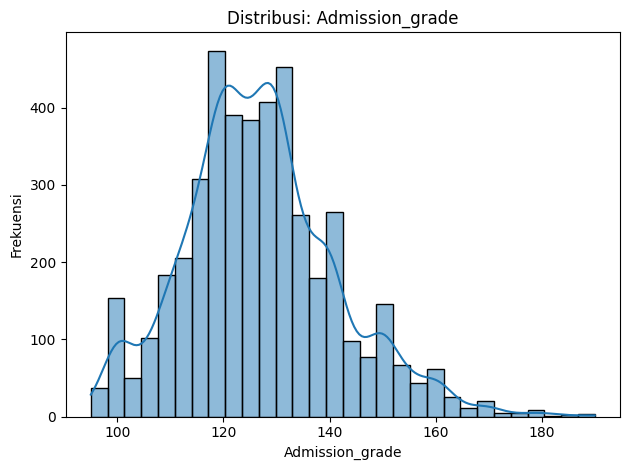

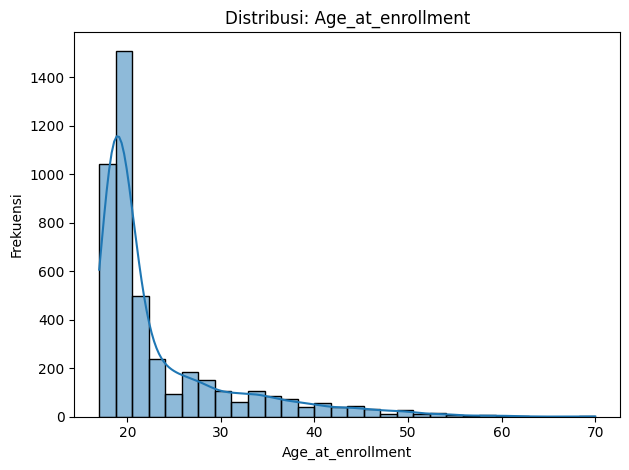

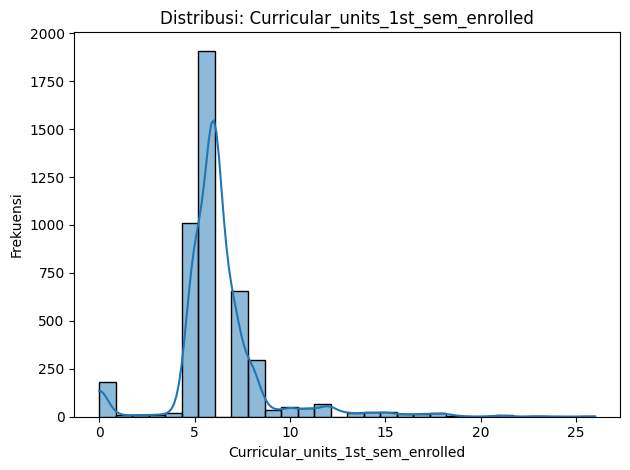

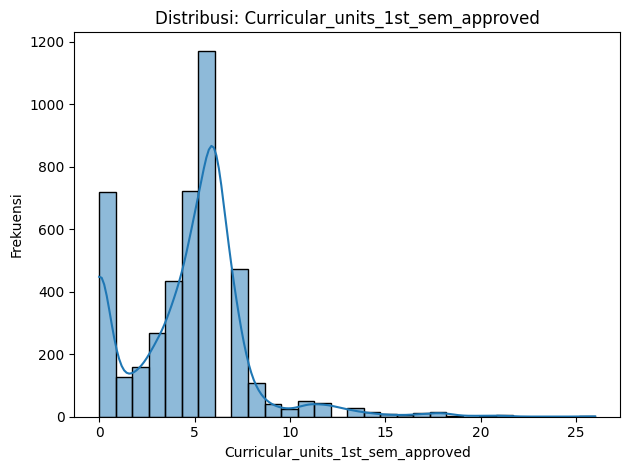

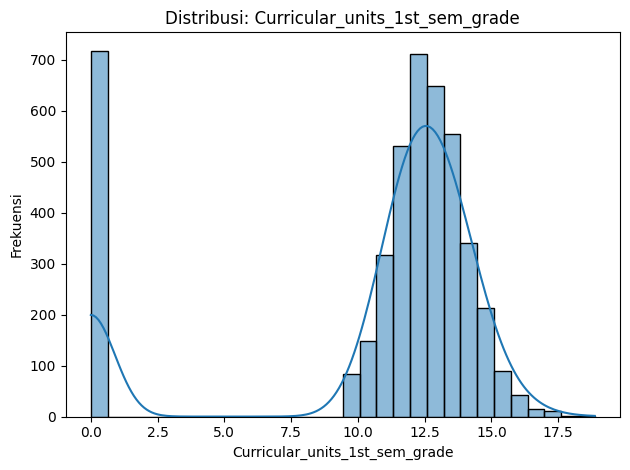

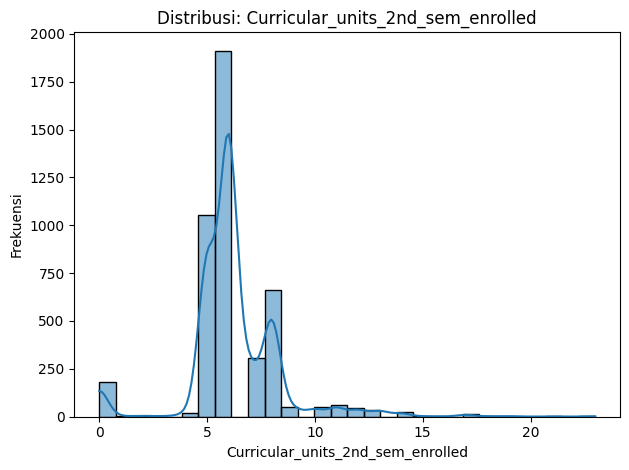

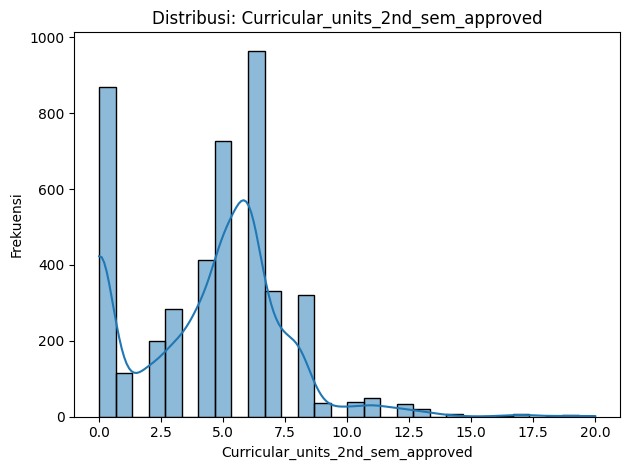

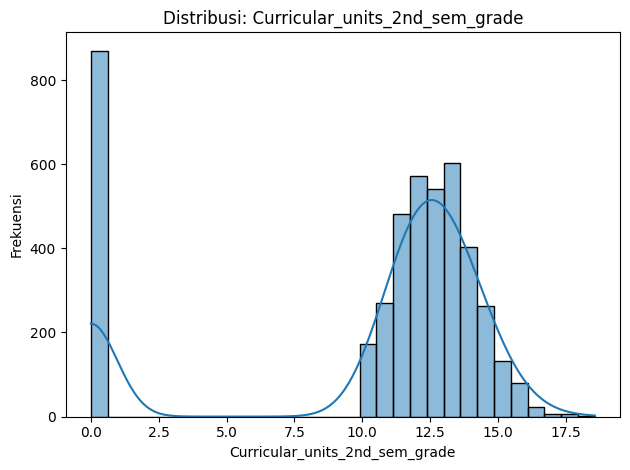

In [10]:
# Pilih kolom numerik untuk univariate analysis
numerical_columns = [
    'Previous_qualification_grade',
    'Admission_grade',
    'Age_at_enrollment',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade'
]

# Buat histogram untuk setiap kolom numerik
for col in numerical_columns:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

Grafik distribusi Previous_qualification_grade dan Admission_grade menunjukkan sebaran nilai yang relatif simetris dan berpusat di sekitar angka 130 untuk nilai sebelumnya dan sekitar 120–130 untuk nilai masuk. Ini menunjukkan bahwa sebagian besar mahasiswa masuk dengan latar belakang akademik yang cukup kuat. Sementara itu, Age_at_enrollment memiliki distribusi yang sangat condong ke kiri (right-skewed), menandakan bahwa sebagian besar mahasiswa mendaftar pada usia muda (sekitar 18–21 tahun), meskipun ada sebagian kecil yang masuk di usia lebih tua, hingga sekitar 70 tahun.

Distribusi Curricular_units_1st_sem_enrolled dan Curricular_units_2nd_sem_enrolled menunjukkan bahwa sebagian besar mahasiswa mengambil sekitar 5–6 mata kuliah per semester, namun terdapat outlier yang mengambil lebih dari 20. Distribusi Curricular_units_1st_sem_approved dan Curricular_units_2nd_sem_approved relatif serupa: sebagian besar mahasiswa lulus 4–6 mata kuliah, namun ada juga yang tidak lulus sama sekali. Hal ini mencerminkan adanya variasi yang signifikan dalam performa akademik mahasiswa.

Untuk Curricular_units_1st_sem_grade, terdapat pola bimodal yang menarik: satu puncak besar pada nilai sekitar 12–13 (yang menunjukkan performa cukup baik), dan satu puncak lain di nilai 0, yang kemungkinan besar merepresentasikan mahasiswa yang tidak hadir atau tidak menyelesaikan evaluasi. Pola serupa terlihat di distribusi semester kedua.

Secara keseluruhan, grafik-grafik ini memberikan gambaran penting tentang karakteristik akademik mahasiswa, yang dapat digunakan untuk mendeteksi pola keberhasilan maupun potensi dropout. Distribusi yang asimetris dan nilai-nilai ekstrim perlu diperhatikan lebih lanjut dalam proses prediksi dan intervensi.

### Bivariate Analysis

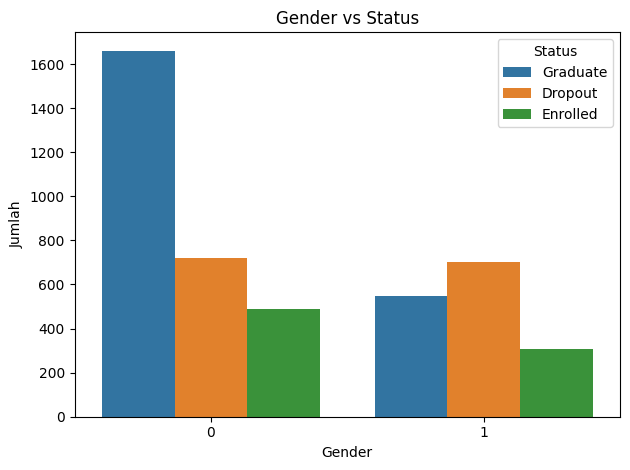

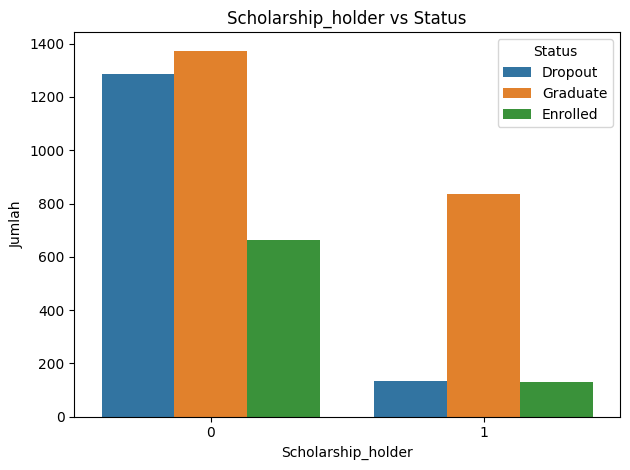

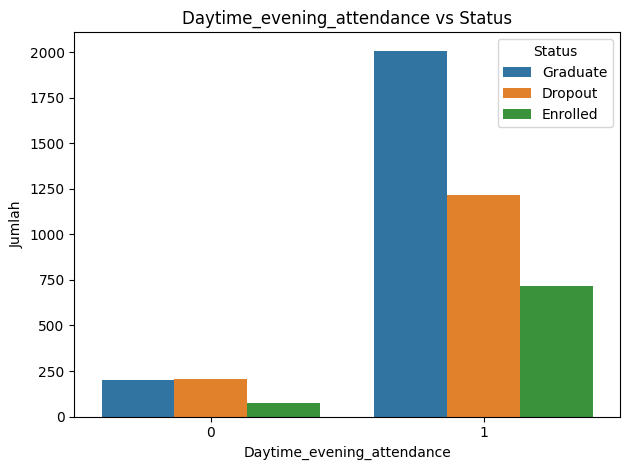

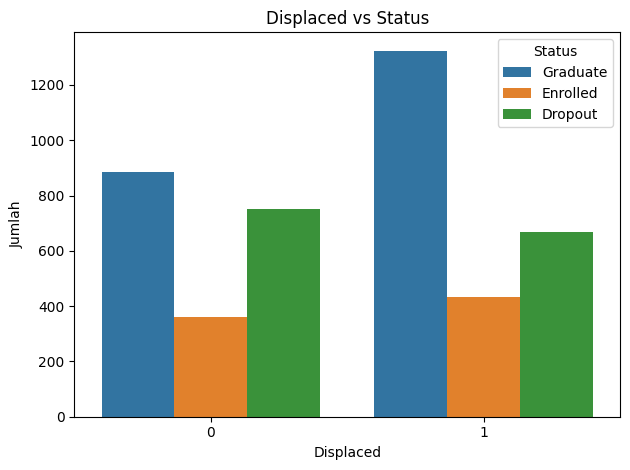

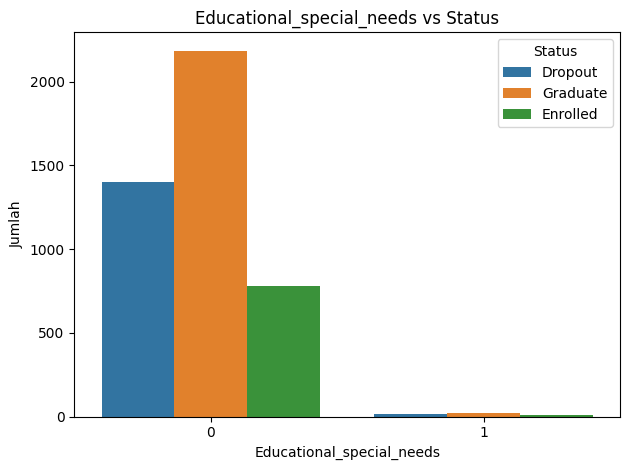

In [11]:
categorical_features = [
    'Gender',
    'Scholarship_holder',
    'Daytime_evening_attendance',
    'Displaced',
    'Educational_special_needs'
]

# Barplot untuk masing-masing fitur kategorikal terhadap Status
for col in categorical_features:
    plt.figure()
    sns.countplot(x=col, hue='Status', data=df)
    plt.title(f'{col} vs Status')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.tight_layout()
    plt.show()

Dari grafik pertama (Gender vs Status), terlihat bahwa mahasiswa perempuan (label 0) cenderung lebih banyak yang lulus dibanding laki-laki (label 1). Sebaliknya, jumlah mahasiswa laki-laki yang mengalami dropout hampir setara atau bahkan lebih tinggi daripada yang lulus, mengindikasikan bahwa gender dapat menjadi salah satu faktor yang memengaruhi keberhasilan studi.

Pada grafik kedua (Scholarship_holder vs Status), mahasiswa yang tidak menerima beasiswa (label 0) memiliki jumlah dropout yang jauh lebih tinggi dibanding penerima beasiswa (label 1). Ini menunjukkan bahwa program beasiswa dapat berperan penting dalam mendukung keberhasilan studi dan menurunkan risiko dropout.

Grafik ketiga (Daytime_evening_attendance vs Status) menunjukkan bahwa mahasiswa kelas pagi (label 1) memiliki jumlah kelulusan yang jauh lebih tinggi dibandingkan mahasiswa kelas malam (label 0), yang justru didominasi oleh dropout dan enrolled. Ini bisa mengindikasikan bahwa mahasiswa kelas malam menghadapi tantangan lebih besar dalam menyelesaikan studi mereka, seperti tanggung jawab kerja atau keterbatasan waktu belajar.

Pada grafik keempat (Displaced vs Status), mahasiswa yang merantau (label 1) memiliki angka kelulusan yang lebih tinggi daripada yang tidak merantau (label 0), meskipun angka dropout pada kelompok ini juga cukup tinggi. Hal ini dapat menunjukkan bahwa meskipun merantau memiliki tantangan tersendiri, banyak mahasiswa perantau tetap mampu menyelesaikan studinya.

Grafik kelima (Educational_special_needs vs Status) memperlihatkan bahwa mayoritas mahasiswa tidak memiliki kebutuhan pendidikan khusus (label 0), dan sebagian besar dari mereka lulus. Sementara itu, jumlah mahasiswa dengan kebutuhan khusus (label 1) sangat sedikit, tetapi tetap menunjukkan adanya representasi yang berhasil lulus, walaupun jumlah dropoutnya sedikit lebih tinggi.

Secara keseluruhan, visualisasi ini menunjukkan bahwa faktor seperti gender, status beasiswa, kelas yang diikuti, dan latar belakang sosial memiliki hubungan yang signifikan terhadap keberhasilan akademik mahasiswa. Temuan ini dapat dimanfaatkan untuk merancang intervensi yang lebih spesifik bagi kelompok yang berisiko tinggi mengalami dropout.

## Data Preparation / Preprocessing

### Missing Values

In [12]:
print(df.isnull().sum())

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


Hasil pemeriksaan missing value menunjukkan bahwa seluruh kolom dalam dataset tidak memiliki nilai yang hilang (missing value). Setiap fitur, mulai dari Marital_status, Admission_grade, hingga Status, memiliki jumlah data lengkap tanpa adanya nilai kosong, yang ditunjukkan dengan angka nol pada semua baris. Kondisi ini sangat ideal untuk proses analisis dan pemodelan karena tidak diperlukan penanganan tambahan seperti imputasi nilai, penghapusan baris, atau transformasi data untuk mengatasi kekosongan. Dengan data yang bersih dan lengkap seperti ini, proses preprocessing dapat difokuskan pada transformasi, normalisasi, dan encoding fitur tanpa perlu khawatir terhadap kualitas atau kelengkapan data. Ini juga memperkuat integritas dataset dan meningkatkan akurasi model karena tidak ada bias yang diakibatkan oleh nilai yang hilang.

### Duplikasi Data

In [13]:
df.duplicated().sum()

np.int64(0)

Hasil pemeriksaan duplikasi data menunjukkan nilai np.int64(0), yang berarti tidak ditemukan baris data yang duplikat dalam dataset. Setiap baris pada dataset merupakan entri yang unik dan tidak ada baris yang identik secara keseluruhan dengan baris lainnya. Kondisi ini sangat baik karena duplikasi data dapat menyebabkan distorsi dalam analisis statistik maupun pelatihan model machine learning, seperti overfitting atau pengaruh berlebih dari data yang berulang. Dengan tidak adanya duplikasi, kita dapat memastikan bahwa hasil analisis dan model yang dibangun mencerminkan pola yang valid dan representatif dari populasi data yang sebenarnya.

### Transformasi Target Variable

Transformasi target variable dilakukan untuk mengubah nilai kategori dalam kolom status, seperti "Graduate", "Dropout", dan "Enrolled", menjadi bentuk numerik. Hal ini bertujuan agar data target dapat dikenali dan diproses dengan benar oleh algoritma machine learning yang umumnya hanya menerima input dalam bentuk angka. Setiap label status diubah menjadi angka unik, misalnya 0, 1, atau 2, sesuai urutan kategorinya. Dengan representasi numerik ini, proses pelatihan model klasifikasi menjadi lebih efisien dan hasil prediksi dapat diinterpretasikan kembali ke bentuk aslinya jika diperlukan. Transformasi ini merupakan langkah penting dalam tahap preprocessing untuk memastikan model dapat mempelajari pola dari data target secara optimal.

In [14]:
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])

In [15]:
df['Status'].head()

,Status
0,0
1,2
2,0
3,2
4,2


### Encoding Fitur Kategorikal

Encoding fitur kategorikal merupakan proses mengubah data dalam bentuk kategori, seperti jenis kelamin, program studi, status pernikahan, dan status beasiswa, menjadi representasi numerik agar dapat diproses oleh algoritma machine learning. Dalam hal ini, setiap kategori dalam kolom-kolom tersebut diubah menjadi kolom biner terpisah yang merepresentasikan kehadiran atau ketidakhadiran suatu nilai kategori. Teknik yang digunakan adalah one-hot encoding, di mana hanya satu kategori yang diberi nilai 1 dan sisanya 0. Untuk menghindari redundansi atau jebakan dummy variable, salah satu kategori dari setiap fitur dihilangkan secara otomatis. Proses ini menghasilkan dataset baru dengan struktur yang sepenuhnya numerik, sehingga siap digunakan dalam pemodelan prediktif tanpa kehilangan makna dari informasi kategorikal awal.


In [16]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'Course', 'Marital_status', 'Scholarship_holder'], drop_first=True)

In [17]:
df_encoded.head()

,Application_mode,Application_order,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,...,Course_9670,Course_9773,Course_9853,Course_9991,Marital_status_2,Marital_status_3,Marital_status_4,Marital_status_5,Marital_status_6,Scholarship_holder_1
0,17,5,1,1,122.0,1,19,12,5,9,...,False,False,False,False,False,False,False,False,False,False
1,15,1,1,1,160.0,1,1,3,3,3,...,False,False,False,False,False,False,False,False,False,False
2,1,5,1,1,122.0,1,37,37,9,9,...,False,False,False,False,False,False,False,False,False,False
3,17,2,1,1,122.0,1,38,37,5,3,...,False,True,False,False,False,False,False,False,False,False
4,39,1,0,1,100.0,1,37,38,9,9,...,False,False,False,False,True,False,False,False,False,False


### Feature Selection

Feature selection adalah proses pemilihan fitur-fitur yang relevan dan berpengaruh terhadap tujuan analisis atau pemodelan, sambil mengeliminasi fitur-fitur yang dianggap tidak penting atau redundan. Dalam konteks ini, beberapa kolom dihapus karena dianggap tidak memberikan kontribusi signifikan terhadap prediksi, bersifat eksternal, atau berpotensi menimbulkan bias. Misalnya, data ekonomi makro seperti tingkat pengangguran, inflasi, dan PDB cenderung bersifat sama untuk banyak entri dalam waktu tertentu, sehingga kurang informatif dalam membedakan status individu siswa. Demikian pula, beberapa fitur lainnya dianggap tumpang tindih atau mengandung informasi yang sudah tercermin dalam fitur lain. Dengan menghapus kolom-kolom tersebut, dataset menjadi lebih ringkas dan fokus, sehingga dapat meningkatkan efisiensi proses pelatihan model serta mengurangi risiko overfitting.

In [18]:
# Daftar kolom yang akan dihapus
columns_to_drop = [
    'Unemployment_rate',
    'Inflation_rate',
    'GDP',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_without_evaluations'
]

# Hapus kolom yang tidak diperlukan
df_reduced = df_encoded.drop(columns=columns_to_drop)

# Tampilkan daftar kolom yang tersisa
print("Kolom yang tersisa:")
print(df_reduced.columns.tolist())

Kolom yang tersisa:
['Application_mode', 'Application_order', 'Daytime_evening_attendance', 'Previous_qualification', 'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Age_at_enrollment', 'International', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Status', 'Gender_1', 'Course_171', 'Course_8014', 'Course_9003', 'Course_9070', 'Course_9085', 'Course_9119', 'Course_9130', 'Course_9147', 'Course_9238', 'Course_9254', 'Course_9500', 'Course_9556', 'Course_9670', 'Course_9773', 'Course_9853', 'Course_9991', 'Marital_status_2', 'Marital_status_3', 'Marital

### Normalisasi atau Standardisasi

Normalisasi atau standardisasi merupakan proses transformasi data numerik agar berada pada skala yang seragam, sehingga setiap fitur memiliki kontribusi yang seimbang dalam proses pelatihan model. Dalam konteks ini, beberapa kolom numerik seperti jumlah mata kuliah yang diambil, nilai akademik, dan usia saat mendaftar distandardisasi agar memiliki nilai rata-rata nol dan standar deviasi satu. Tujuan utama dari langkah ini adalah untuk menghindari dominasi fitur-fitur dengan skala nilai besar terhadap fitur lainnya dalam proses pembelajaran algoritma, terutama pada model-model yang sensitif terhadap skala seperti regresi logistik, KNN, atau SVM. Hasil standardisasi kemudian digabungkan kembali dengan kolom non-numerik dan kolom target, membentuk dataset akhir yang siap digunakan untuk proses modeling. Normalisasi ini merupakan bagian penting dalam preprocessing karena dapat meningkatkan stabilitas, kecepatan konvergensi, dan akurasi model prediksi.

In [19]:
# Tentukan kolom numerik (kecuali kolom target)
numeric_columns = [
    'Application_order',
    'Previous_qualification_grade',
    'Admission_grade',
    'Age_at_enrollment',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade'
]

# Lakukan normalisasi
scaler = StandardScaler()
df_scaled_values = scaler.fit_transform(df_reduced[numeric_columns])

# Masukkan hasil normalisasi ke dataframe baru
df_scaled = pd.DataFrame(df_scaled_values, columns=numeric_columns)

# Gabungkan hasil normalisasi dengan kolom non-numerik (dan target 'Status')
df_final = pd.concat([df.drop(columns=numeric_columns), df_scaled], axis=1)

# Tampilkan 5 baris pertama dari dataframe akhir
print(df_final.head())

   Marital_status  Application_mode  Course  Daytime_evening_attendance  \
0               1                17     171                           1   
1               1                15    9254                           1   
2               1                 1    9070                           1   
3               1                17    9773                           1   
4               2                39    8014                           0   

   Previous_qualification  Nacionality  Mothers_qualification  \
0                       1            1                     19   
1                       1            1                      1   
2                       1            1                     37   
3                       1            1                     38   
4                       1            1                     37   

   Fathers_qualification  Mothers_occupation  Fathers_occupation  ...  \
0                     12                   5                   9  ...   
1           

### Pemisahan Fitur dan Target

Pemisahan fitur dan target merupakan langkah penting dalam proses persiapan data sebelum pelatihan model machine learning. Dalam tahap ini, data dibagi menjadi dua komponen utama: fitur (variabel independen) dan target (variabel dependen). Fitur terdiri dari seluruh kolom yang berisi informasi atau atribut yang akan digunakan model untuk mempelajari pola, seperti nilai akademik, status beasiswa, dan usia saat mendaftar. Sementara itu, target adalah kolom yang ingin diprediksi oleh model, yaitu status akhir mahasiswa seperti apakah ia dropout, masih terdaftar, atau sudah lulus. Dengan memisahkan keduanya, proses pelatihan model dapat difokuskan pada bagaimana fitur-fitur tersebut memengaruhi atau berkaitan dengan nilai target, yang menjadi dasar pembentukan pola prediktif oleh algoritma.


In [20]:
X = df_final.drop('Status', axis=1)
y = df_final['Status']

### Splitting Data untuk Pelatihan dan Pengujian

Splitting data untuk pelatihan dan pengujian merupakan proses membagi dataset menjadi dua bagian utama: data latih dan data uji. Data latih digunakan oleh model untuk mempelajari pola dari fitur-fitur yang tersedia, sedangkan data uji digunakan untuk mengevaluasi performa model terhadap data baru yang belum pernah dilihat sebelumnya. Dalam proses ini, sekitar 80% data dialokasikan untuk pelatihan dan 20% sisanya untuk pengujian. Pembagian dilakukan secara acak, namun tetap mempertahankan proporsi kelas target melalui proses stratifikasi, sehingga distribusi kelas seperti dropout, enrolled, dan graduate tetap seimbang di kedua subset. Strategi ini penting untuk menghindari bias dan memastikan bahwa evaluasi model mencerminkan kemampuannya dalam menghadapi data nyata.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Modeling

Modeling menggunakan Random Forest dilakukan dengan melatih algoritma pada data pelatihan agar dapat mempelajari pola hubungan antara fitur dan target. Setelah proses pelatihan selesai, model digunakan untuk memprediksi nilai target pada data pengujian yang belum pernah dilihat sebelumnya. Random Forest dipilih sebagai algoritma karena memiliki sejumlah keunggulan yang membuatnya cocok untuk tugas klasifikasi seperti prediksi status mahasiswa. Algoritma ini bekerja dengan membangun banyak pohon keputusan secara paralel dan menggabungkan hasilnya, sehingga mampu menghasilkan prediksi yang lebih akurat dan stabil dibandingkan dengan pohon tunggal. Random Forest juga tahan terhadap overfitting, mampu menangani data numerik maupun kategorikal, dan dapat memberikan informasi penting terkait fitur-fitur mana yang paling berpengaruh terhadap keputusan model. Karena fleksibilitas dan keandalannya, Random Forest sering menjadi pilihan utama dalam pemodelan prediktif berbasis data tabular.

In [25]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
# Simpan model ke file
joblib.dump(rf, 'model/random_forest_model.pkl')

['model/random_forest_model.pkl']

## Evaluation


=== Random Forest ===
              precision    recall  f1-score   support

     Dropout       0.81      0.76      0.78       284
    Enrolled       0.54      0.35      0.42       159
    Graduate       0.79      0.92      0.85       442

    accuracy                           0.77       885
   macro avg       0.71      0.68      0.68       885
weighted avg       0.75      0.77      0.75       885

Confusion Matrix:


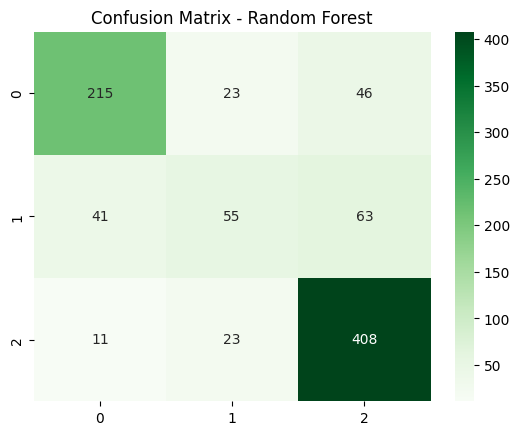

In [26]:
# Load kembali modelnya
rf = joblib.load('model/random_forest_model.pkl')

y_pred_rf = rf.predict(X_test)
print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()

Hasil evaluasi model Random Forest yang ditampilkan menunjukkan bahwa model memiliki performa yang cukup baik secara keseluruhan, dengan akurasi sebesar 77% pada data pengujian. Berdasarkan confusion matrix, model mampu mengklasifikasikan sebagian besar mahasiswa yang benar-benar lulus (Graduate) dengan tepat, yakni sebanyak 408 dari 442 kasus. Hal ini juga tercermin dari nilai recall sebesar 0.92 dan f1-score sebesar 0.85 untuk kelas Graduate, yang menandakan bahwa model sangat andal dalam mengenali mahasiswa yang berhasil menyelesaikan studinya.

Untuk kelas Dropout, performa model juga tergolong baik dengan precision 0.81 dan recall 0.76, yang menunjukkan keseimbangan antara prediksi yang tepat dan kemampuan menangkap kasus dropout secara menyeluruh. Namun, performa model menurun cukup signifikan pada kelas Enrolled, dengan recall hanya 0.35 dan f1-score sebesar 0.42, yang mengindikasikan bahwa model kurang mampu mengidentifikasi mahasiswa yang masih terdaftar secara akurat, bahkan seringkali keliru memprediksi mereka sebagai dropout atau graduate.

Secara umum, nilai rata-rata makro untuk precision, recall, dan f1-score berada di kisaran 0.68–0.71, yang menunjukkan ketidakseimbangan performa antar kelas. Meskipun demikian, model tetap memberikan hasil yang dapat diandalkan untuk memprediksi status akhir mahasiswa, khususnya untuk kasus dropout dan graduate. Kelemahan dalam mendeteksi status Enrolled bisa menjadi fokus perbaikan di tahap pengembangan model selanjutnya, misalnya dengan menyeimbangkan data atau menggunakan metode khusus untuk meningkatkan prediksi kelas minoritas.

## Rekomendasikan Action Items

### Fitur Paling Berpengaruh

In [ ]:
# Ambil feature importance dari model
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Tampilkan fitur paling berpengaruh
print("Top 5 Faktor Penyebab Dropout:")
print(importance_df.head(5))

### Simulasi

In [ ]:
# Mapping fitur ke rekomendasi action items
action_map = {
    'Curricular_units_1st_sem_approved': "Tawarkan bimbingan akademik tambahan.",
    'Tuition_fees_up_to_date': "Hubungi siswa untuk menyelesaikan administrasi keuangan.",
    'Scholarship_holder': "Tawarkan bantuan finansial atau beasiswa tambahan.",
    'Displaced': "Sediakan layanan dukungan untuk siswa yang tinggal jauh dari rumah.",
    'Admission_grade': "Berikan pelatihan belajar mandiri atau workshop persiapan kuliah.",
    'Age_at_enrollment': "Kembangkan program mentoring untuk siswa usia non-tradisional.",
}

predictions = rf.predict(X_test)
dropout_indices = np.where(predictions == 0)[0]  # 0 = dropout
siswa_index = dropout_indices[0]
siswa_data = X_test.iloc[siswa_index]

# Cetak rekomendasi tindakan
print("\nRekomendasi untuk siswa yang berisiko dropout:")
for feat in importance_df['Feature'].head(5):
    if feat in action_map:
        print(f"- {action_map[feat]}")

Hasil rekomendasi action items yang Anda peroleh menunjukkan bahwa model Random Forest telah berhasil mengidentifikasi lima fitur utama yang paling berpengaruh terhadap risiko mahasiswa mengalami dropout. Dua fitur teratas berasal dari semester kedua, yaitu jumlah mata kuliah yang disetujui (lulus) dan rata-rata nilai semester, yang masing-masing memiliki kontribusi penting sebesar 14% dan 11%. Ini mengindikasikan bahwa kinerja akademik di semester kedua sangat berpengaruh terhadap keputusan mahasiswa untuk melanjutkan atau menghentikan studinya.

Selain itu, performa di semester pertama — baik dari jumlah mata kuliah yang lulus maupun rata-rata nilai — juga termasuk dalam faktor penting, diikuti oleh nilai masuk (admission grade) yang mencerminkan kesiapan awal mahasiswa saat pertama kali mendaftar. Berdasarkan analisis ini, rekomendasi yang diberikan, seperti bimbingan akademik tambahan dan pelatihan belajar mandiri, sangat relevan karena langsung menyasar pada akar permasalahan: yaitu kurangnya keberhasilan akademik di semester awal dan lanjutan.

Rekomendasi ini dapat digunakan sebagai dasar intervensi strategis oleh institusi, seperti menyediakan tutor, program remedial, atau workshop pengembangan kemampuan belajar, khususnya bagi mahasiswa yang performanya mulai menurun sejak semester pertama. Pendekatan berbasis data seperti ini sangat efektif dalam mendeteksi risiko secara dini dan memberi dukungan yang tepat sebelum mahasiswa memutuskan untuk keluar dari program studi.